In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# File paths
interest_rate_file = '../data/interest_rate_india.csv'
msci_file = '../data/MSCI India Historical Data.csv'
cpi_file = '../data/india_cpi.csv'

# Reading the data files
interest_rate_data = pd.read_csv(interest_rate_file)
msci_data = pd.read_csv(msci_file)
cpi_data = pd.read_csv(cpi_file, encoding='utf-8')

# Parsing date columns to datetime format
interest_rate_data['observation_date'] = pd.to_datetime(interest_rate_data['observation_date'], format='%d-%m-%Y')
msci_data['Date'] = pd.to_datetime(msci_data['Date'], format='%d-%m-%Y')
cpi_data['observation_date'] = pd.to_datetime(cpi_data['observation_date'], format='%d-%m-%Y')

# Renaming columns for clarity
interest_rate_data.rename(columns={'observation_date': 'Date', 'INTDSRINM193N': 'Interest_Rate'}, inplace=True)
msci_data.rename(columns={'Date': 'Date', 'Price': 'Price'}, inplace=True)
cpi_data.rename(columns={'observation_date': 'Date', 'INDCPALTT01IXNBM': 'CPI'}, inplace=True)

# Extracting relevant columns
interest_rate_data = interest_rate_data[['Date', 'Interest_Rate']]
msci_data = msci_data[['Date', 'Price']]
cpi_data = cpi_data[['Date', 'CPI']]

# Converting MSCI closing prices to numeric (removing commas, if any, and handling missing data)
msci_data['Price'] = (
    msci_data['Price']
    .str.replace(',', '', regex=False)  # Remove commas
    .astype(float)  # Convert to float
)

# Aligning data to monthly frequency (beginning of each month)
interest_rate_data['Date'] = interest_rate_data['Date'].dt.to_period('M').dt.to_timestamp()
msci_data['Date'] = msci_data['Date'].dt.to_period('M').dt.to_timestamp()
cpi_data['Date'] = cpi_data['Date'].dt.to_period('M').dt.to_timestamp()

# Merging dataframes to find overlapping months
combined_df = (
    pd.merge(interest_rate_data, msci_data, on='Date', how='inner')
    .merge(cpi_data, on='Date', how='inner')
)

# Displaying the combined dataframe
print(combined_df.head())

        Date  Interest_Rate   Price    CPI
0 2004-08-01            6.0  216.34  39.28
1 2004-09-01            6.0  232.08  39.36
2 2004-10-01            6.0  237.28  39.59
3 2004-11-01            6.0  261.06  39.51
4 2004-12-01            6.0  273.14  39.21


In [5]:
combined_df["MSCI India Returns"] = combined_df["Price"].pct_change() * 100
combined_df["CPI Change"] = combined_df["CPI"].pct_change() * 100
combined_df.set_index('Date', inplace=True)

In [6]:
combined_df

,Interest_Rate,Price,CPI,MSCI India Returns,CPI Change
Date,,,,,
2004-08-01,6.0,216.34,39.28,NaN,NaN
2004-09-01,6.0,232.08,39.36,7.275585,0.203666
2004-10-01,6.0,237.28,39.59,2.240607,0.584350
2004-11-01,6.0,261.06,39.51,10.021915,-0.202071
2004-12-01,6.0,273.14,39.21,4.627289,-0.759301
...,...,...,...,...,...
2023-07-01,6.5,2210.78,139.70,3.145529,2.419355
2023-08-01,6.5,2179.05,139.20,-1.435240,-0.357910
2023-09-01,6.5,2223.50,137.50,2.039880,-1.221264


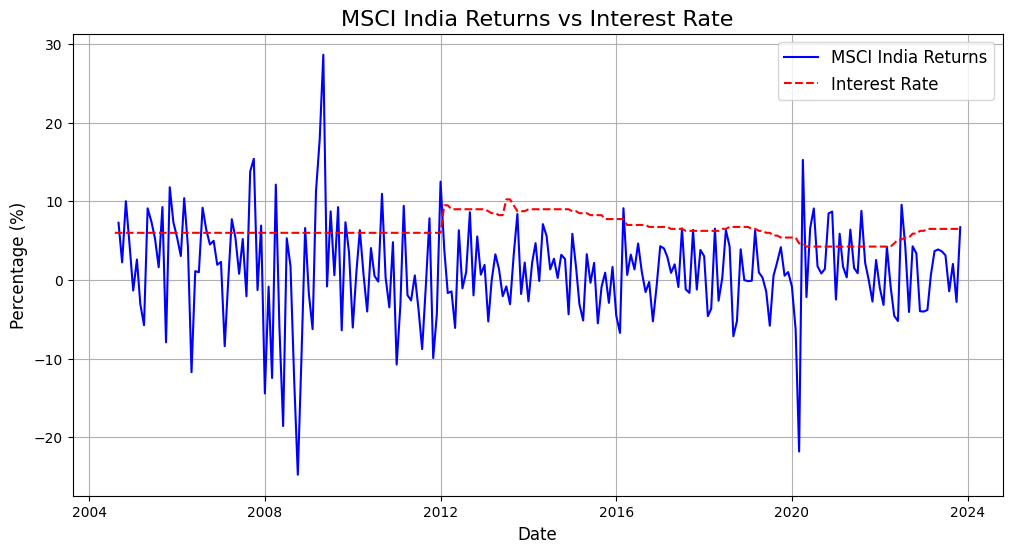

In [7]:
# Set the 'Date' column as the index if not already
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(combined_df["MSCI India Returns"], label="MSCI India Returns", color="blue")
plt.plot(combined_df["Interest_Rate"], label="Interest Rate", color="red", linestyle="--")

# Adding labels, title, and legend
plt.title("MSCI India Returns vs Interest Rate", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

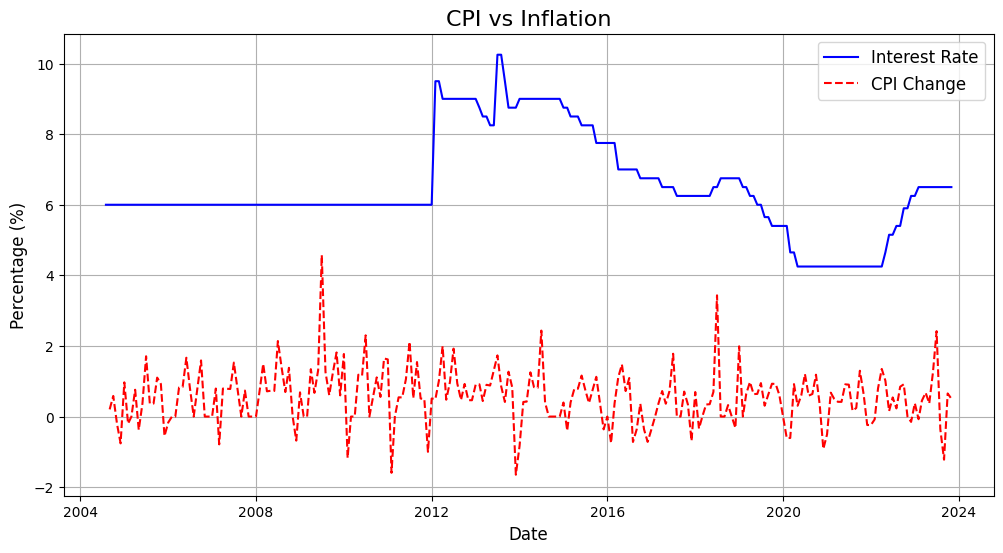

In [8]:
# Set the 'Date' column as the index if not already
# combined_df.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(combined_df["Interest_Rate"], label="Interest Rate", color="blue")
plt.plot(combined_df["CPI Change"], label="CPI Change", color="red", linestyle="--")

# Adding labels, title, and legend
plt.title("CPI vs Inflation", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

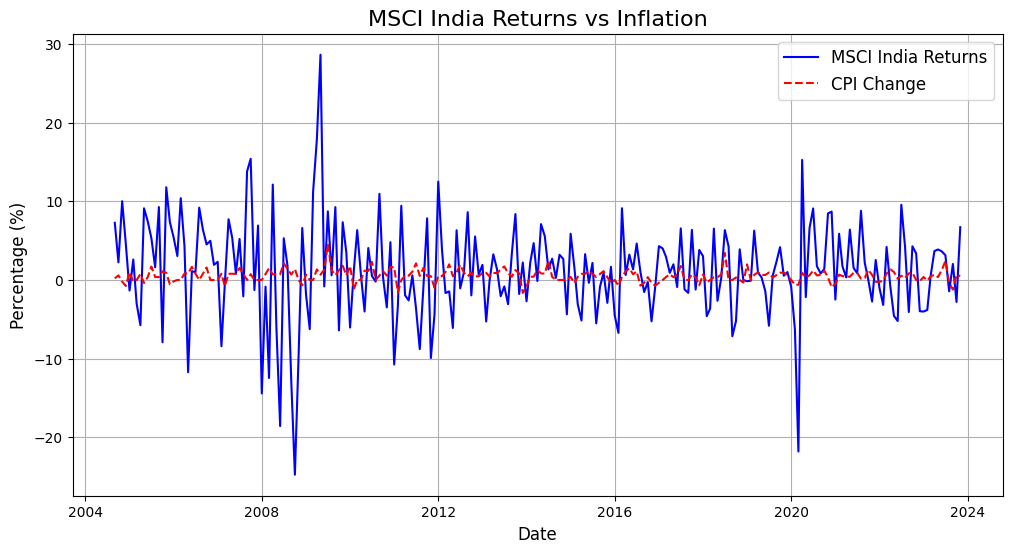

In [9]:
# Set the 'Date' column as the index if not already
# combined_df.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(combined_df["MSCI India Returns"], label="MSCI India Returns", color="blue")
plt.plot(combined_df["CPI Change"], label="CPI Change", color="red", linestyle="--")

# Adding labels, title, and legend
plt.title("MSCI India Returns vs Inflation", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

In [10]:
# Subset the data for the selected columns
columns = ['MSCI India Returns', 'CPI Change', 'Interest_Rate']
correlation_data = combined_df[columns].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()
correlation_matrix

,MSCI India Returns,CPI Change,Interest_Rate
MSCI India Returns,1.000000,0.048941,-0.041290
CPI Change,0.048941,1.000000,0.056693
Interest_Rate,-0.041290,0.056693,1.000000


In [11]:
cpi_df = combined_df['CPI']
cpi_df =  cpi_df.resample('Q').first()
cpi_df

C:\Users\rmehta\AppData\Local\Temp\ipykernel_30732\2373457335.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  cpi_df =  cpi_df.resample('Q').first()


Date
2004-09-30     39.28
2004-12-31     39.59
2005-03-31     39.59
2005-06-30     39.81
2005-09-30     40.49
               ...  
2022-12-31    132.50
2023-03-31    132.80
2023-06-30    134.20
2023-09-30    139.70
2023-12-31    138.40
Freq: QE-DEC, Name: CPI, Length: 78, dtype: float64

In [12]:
cpi_df_pct_change = cpi_df.pct_change()*100
cpi_df_pct_change

Date
2004-09-30         NaN
2004-12-31    0.789206
2005-03-31    0.000000
2005-06-30    0.555696
2005-09-30    1.708114
                ...   
2022-12-31    2.001540
2023-03-31    0.226415
2023-06-30    1.054217
2023-09-30    4.098361
2023-12-31   -0.930565
Freq: QE-DEC, Name: CPI, Length: 78, dtype: float64

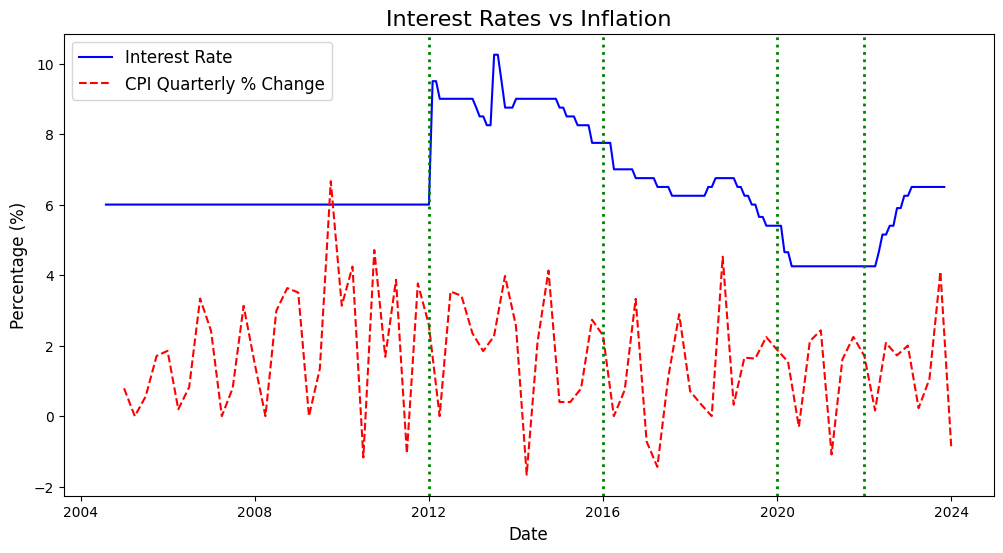

In [13]:
# Set the 'Date' column as the index if not already
# combined_df.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(combined_df["Interest_Rate"], label="Interest Rate", color="blue")
plt.plot(cpi_df_pct_change, label="CPI Quarterly % Change", color="red", linestyle="--")

x_indices = [pd.to_datetime('2012-01-01'), pd.to_datetime('2016-01-01'), pd.to_datetime('2020-01-01'), pd.to_datetime('2022-01-01')]

for idx in x_indices:
    plt.axvline(x=idx, color='green', linestyle='dotted', linewidth=2)

# Adding labels, title, and legend
plt.title("Interest Rates vs Inflation", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(fontsize=12)
# plt.grid(True)

# Show the plot
plt.show()

In [14]:
msci_df = combined_df['Price']
msci_df =  cpi_df.resample('Q').first()
msci_df = msci_df.pct_change()*100
msci_df

C:\Users\rmehta\AppData\Local\Temp\ipykernel_30732\2462401942.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  msci_df =  cpi_df.resample('Q').first()


Date
2004-09-30         NaN
2004-12-31    0.789206
2005-03-31    0.000000
2005-06-30    0.555696
2005-09-30    1.708114
                ...   
2022-12-31    2.001540
2023-03-31    0.226415
2023-06-30    1.054217
2023-09-30    4.098361
2023-12-31   -0.930565
Freq: QE-DEC, Name: CPI, Length: 78, dtype: float64

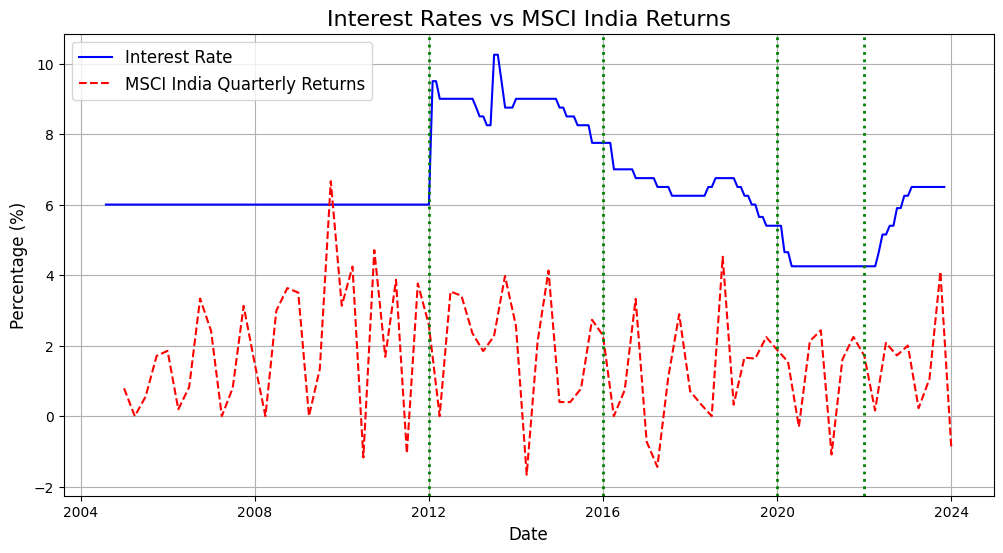

In [15]:
# Set the 'Date' column as the index if not already
# combined_df.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(combined_df["Interest_Rate"], label="Interest Rate", color="blue")
plt.plot(msci_df, label="MSCI India Quarterly Returns", color="red", linestyle="--")

x_indices = [pd.to_datetime('2012-01-01'), pd.to_datetime('2016-01-01'), pd.to_datetime('2020-01-01'), pd.to_datetime('2022-01-01')]

for idx in x_indices:
    plt.axvline(x=idx, color='green', linestyle='dotted', linewidth=2)

# Adding labels, title, and legend
plt.title("Interest Rates vs MSCI India Returns", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

In [16]:
msci_df['2004-09-30':'2011-12-31'].mean()

np.float64(1.9653650467044204)

In [17]:
msci_df['2012-01-31':'2019-12-31'].mean()

np.float64(1.5725178793622643)

In [18]:
msci_df['2020-01-31':].mean()

np.float64(1.2929548743080617)

## 2005 to 2011

In [19]:
yearly_2005_2011 = combined_df[:'2011-12-01'].resample('Y').last()
yearly_2005_2011_change = yearly_2005_2011.pct_change()*100

C:\Users\rmehta\AppData\Local\Temp\ipykernel_30732\264735450.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_2005_2011 = combined_df[:'2011-12-01'].resample('Y').last()


In [20]:
combined_df

,Interest_Rate,Price,CPI,MSCI India Returns,CPI Change
Date,,,,,
2004-08-01,6.0,216.34,39.28,NaN,NaN
2004-09-01,6.0,232.08,39.36,7.275585,0.203666
2004-10-01,6.0,237.28,39.59,2.240607,0.584350
2004-11-01,6.0,261.06,39.51,10.021915,-0.202071
2004-12-01,6.0,273.14,39.21,4.627289,-0.759301
...,...,...,...,...,...
2023-07-01,6.5,2210.78,139.70,3.145529,2.419355
2023-08-01,6.5,2179.05,139.20,-1.435240,-0.357910
2023-09-01,6.5,2223.50,137.50,2.039880,-1.221264


In [21]:
yearly_2005_2011

,Interest_Rate,Price,CPI,MSCI India Returns,CPI Change
Date,,,,,
2004-12-31,6.0,273.14,39.21,4.627289,-0.759301
2005-12-31,6.0,382.87,41.39,7.360776,-0.552619
2006-12-31,6.0,560.78,44.09,1.928495,0.000000
2007-12-31,6.0,855.12,46.52,6.924751,0.000000
2008-12-31,6.0,369.22,51.04,6.612382,-0.681066
2009-12-31,6.0,707.10,58.68,3.492184,0.600034
2010-12-31,6.0,811.34,64.23,4.808040,1.645830
2011-12-31,6.0,597.68,68.40,-4.381909,-0.998697


In [22]:
yearly_2005_2011_change

,Interest_Rate,Price,CPI,MSCI India Returns,CPI Change
Date,,,,,
2004-12-31,NaN,NaN,NaN,NaN,NaN
2005-12-31,0.0,40.173537,5.559806,59.073198,-27.220086
2006-12-31,0.0,46.467469,6.523315,-73.800388,-100.000000
2007-12-31,0.0,52.487607,5.511454,259.075401,NaN
2008-12-31,0.0,-56.822434,9.716251,-4.510905,-inf
2009-12-31,0.0,91.511836,14.968652,-47.187194,-188.102177
2010-12-31,0.0,14.741904,9.458078,37.680022,174.289331
2011-12-31,0.0,-26.334213,6.492293,-191.137119,-160.680467


In [23]:
yearly_2005_2011_change.mean()

Interest_Rate          0.000000
Price                 23.175101
CPI                    8.318550
MSCI India Returns     5.599002
CPI Change                 -inf
dtype: float64

## 2012 to 2016

In [24]:
yearly_2012_2016 = combined_df['2011-01-01':'2016-12-01'].resample('Y').last()
yearly_2012_2016_change = yearly_2012_2016.pct_change()*100

C:\Users\rmehta\AppData\Local\Temp\ipykernel_30732\2936401775.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_2012_2016 = combined_df['2011-01-01':'2016-12-01'].resample('Y').last()


In [25]:
yearly_2012_2016['Interest_Rate'].mean()

np.float64(7.875)

In [26]:
yearly_2012_2016_change

,Interest_Rate,Price,CPI,MSCI India Returns,CPI Change
Date,,,,,
2011-12-31,NaN,NaN,NaN,NaN,NaN
2012-12-31,50.000000,27.864409,11.169591,-115.513515,-146.301562
2013-12-31,-2.777778,6.928633,9.126775,226.813350,-456.284732
2014-12-31,2.857143,24.368247,5.856833,-296.491783,-100.000000
2015-12-31,-13.888889,-2.970580,6.329690,-138.189799,-inf
2016-12-31,-12.903226,-0.295099,2.226981,-155.488058,97.813309


In [27]:
yearly_2012_2016_change.mean()

Interest_Rate          4.657450
Price                 11.179122
CPI                    6.941974
MSCI India Returns   -95.773961
CPI Change                 -inf
dtype: float64

## 2017 to 2019

In [28]:
yearly_2017_2019 = combined_df['2016-01-01':'2019-12-01'].resample('Y').last()
yearly_2017_2019_onward_change = yearly_2017_2019.pct_change()*100

C:\Users\rmehta\AppData\Local\Temp\ipykernel_30732\2208105186.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_2017_2019 = combined_df['2016-01-01':'2019-12-01'].resample('Y').last()


In [29]:
yearly_2017_2019['Interest_Rate'].mean()

np.float64(6.2875)

In [30]:
yearly_2017_2019_onward_change

,Interest_Rate,Price,CPI,MSCI India Returns,CPI Change
Date,,,,,
2016-12-31,NaN,NaN,NaN,NaN,NaN
2017-12-31,-7.407407,28.676770,4.000838,-512.946542,-3.820382
2018-12-31,8.000000,-0.191282,5.246727,-100.290209,-53.008646
2019-12-31,-20.000000,8.460241,9.635442,-9174.253643,-289.557119


In [31]:
yearly_2017_2019_onward_change.mean()

Interest_Rate           -6.469136
Price                   12.315243
CPI                      6.294336
MSCI India Returns   -3262.496798
CPI Change            -115.462049
dtype: float64

## 2020 to 2022

In [32]:
yearly_2019_on = combined_df['2019-01-01':'2022-12-01'].resample('Y').last()
yearly_2019_on_change = yearly_2019_on.pct_change()*100

C:\Users\rmehta\AppData\Local\Temp\ipykernel_30732\1541266219.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_2019_on = combined_df['2019-01-01':'2022-12-01'].resample('Y').last()


In [33]:
yearly_2019_on['Interest_Rate'].mean()

np.float64(5.0375)

In [34]:
yearly_2019_on_change

,Interest_Rate,Price,CPI,MSCI India Returns,CPI Change
Date,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN
2020-12-31,-21.296296,16.836794,3.683016,765.353701,-249.252949
2021-12-31,0.000000,27.271193,5.555556,-70.778134,-73.985680
2022-12-31,47.058824,1.573264,5.502392,-256.211096,-36.754717


In [35]:
yearly_2019_on_change.mean()

Interest_Rate           8.587509
Price                  15.227084
CPI                     4.913655
MSCI India Returns    146.121491
CPI Change           -119.997782
dtype: float64

## 2023 to 2024

In [36]:
yearly_2022_on = combined_df['2022-01-01':'2024-01-01'].resample('Y').first()
yearly_2022_on_change = yearly_2022_on.pct_change()*100

C:\Users\rmehta\AppData\Local\Temp\ipykernel_30732\1812268404.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_2022_on = combined_df['2022-01-01':'2024-01-01'].resample('Y').first()


In [37]:
yearly_2022_on['Interest_Rate'].mean()

np.float64(5.25)

In [38]:
yearly_2022_on_change

,Interest_Rate,Price,CPI,MSCI India Returns,CPI Change
Date,,,,,
2022-12-31,NaN,NaN,NaN,NaN,NaN
2023-12-31,47.058824,-1.515843,6.155076,299.233881,-257.974301


In [39]:
yearly_2022_on_change.mean()

Interest_Rate          47.058824
Price                  -1.515843
CPI                     6.155076
MSCI India Returns    299.233881
CPI Change           -257.974301
dtype: float64

In [40]:
combined_df

,Interest_Rate,Price,CPI,MSCI India Returns,CPI Change
Date,,,,,
2004-08-01,6.0,216.34,39.28,NaN,NaN
2004-09-01,6.0,232.08,39.36,7.275585,0.203666
2004-10-01,6.0,237.28,39.59,2.240607,0.584350
2004-11-01,6.0,261.06,39.51,10.021915,-0.202071
2004-12-01,6.0,273.14,39.21,4.627289,-0.759301
...,...,...,...,...,...
2023-07-01,6.5,2210.78,139.70,3.145529,2.419355
2023-08-01,6.5,2179.05,139.20,-1.435240,-0.357910
2023-09-01,6.5,2223.50,137.50,2.039880,-1.221264


In [41]:
msci_2023_2024 = msci_data[msci_data['Date'] >= '2022-01-01']
msci_2023_2024 = msci_2023_2024.set_index('Date')
msci_2023_2024 = msci_2023_2024.resample('Y').first()
msci_2023_2024 = msci_2023_2024.pct_change()*100
msci_2023_2024.mean()

C:\Users\rmehta\AppData\Local\Temp\ipykernel_30732\1212882187.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  msci_2023_2024 = msci_2023_2024.resample('Y').first()


Price    13.243982
dtype: float64

In [53]:
import pandas as pd

# factor data
data_factors = pd.read_csv('../data/indian_factors.csv')
# market data
data_market = pd.read_csv('../data/indian_market.csv')

# size data, should be part of all factors
data_size = pd.read_csv('../data/indian_size.csv')
# data_size['date'] = pd.to_datetime(data_size['date'], format='%d-%m-%Y')
# data_size['date'] = data_size['date'] + pd.offsets.MonthEnd()

# Risk free rate
data_risk_free = pd.read_csv('../data/indian_risk_free_rate.csv')
data_risk_free['date'] = pd.to_datetime(data_risk_free['date'], format='%d-%m-%Y')

# exchange rate data
fx = pd.read_csv('../data/exch.csv')

# Convert date to datetime and filter by 'INR'
fx['date'] = pd.to_datetime(fx['date'], format='%Y%m%d')
fx = fx[fx['curcdd'] == 'INR']

# Extract year and month for grouping
fx['year'] = fx['date'].dt.year
fx['month'] = fx['date'].dt.month

# Sort by date, group by year and month, and get the last value of 'fx' and 'date'
fx = fx.sort_values('date').groupby(['year', 'month']).agg({
    'fx': 'last',
    'date': 'last'
}).reset_index(drop=True)

# Adjust the 'date' to the end of the month
fx['eom'] = fx['date'] + pd.offsets.MonthEnd(0)

# Sort by 'eom' and calculate the percentage change in 'fx'
fx = fx.sort_values('eom')
fx['fx_ret'] = fx['fx'].pct_change()

# Filter out null values for 'fx_ret'
fx = fx[fx['fx_ret'].notna()]


factors_to_use = ['mkt', 'be_me', 'size', 'ret_12_1', 'risk_free']

# Concatenate factors
factors = pd.concat([data_factors, data_market, data_size, data_risk_free])

# Convert date to datetime and filter relevant factors
factors['eom'] = pd.to_datetime(factors['date'], format='%Y-%m-%d')
factors = factors[factors['name'].isin(factors_to_use)]

# Pivot to wide format
factors = factors.pivot_table(index='eom', columns='name', values='ret')

# Join with fx data
factors = factors.merge(fx, on='eom', how='left')

# Adjusting factor returns with FX data
factors['be_me'] = ((factors['be_me'] + 1) * (factors['fx_ret'] + 1) - 1) * 100
factors['ret_12_1'] = ((factors['ret_12_1'] + 1) * (factors['fx_ret'] + 1) - 1) * 100
factors['mkt'] = ((factors['mkt'] + 1) * (factors['fx_ret'] + 1) - 1) * 100
factors['size'] = ((factors['size'] + 1) * (factors['fx_ret'] + 1) - 1) * 100

# Drop unnecessary columns and filter by date range
factors = factors.drop(['fx', 'fx_ret'], axis=1)

In [54]:
factors = factors.set_index('eom')

## Factor Returns 2005 to 2012

In [55]:
factor_2005_2012 = factors['2005-01-01':'2012-12-31']
factor_2005_2012

,be_me,mkt,ret_12_1,risk_free,size,date
eom,,,,,,
2005-01-31,-3.060216,-3.106695,2.562489,0.441657,-1.929646,2005-01-31
2005-02-28,4.305966,4.432990,3.274773,0.393824,0.585133,2005-02-28
2005-03-31,-2.983983,-4.047642,4.362910,0.434989,0.333367,2005-03-31
2005-04-30,2.320658,-3.498941,-1.697202,0.404855,5.276796,2005-04-30
2005-05-31,-0.276093,7.068564,-0.539677,0.443123,-1.591799,2005-05-31
...,...,...,...,...,...,...
2012-08-31,-8.527709,0.262283,6.425952,0.673734,-1.040818,2012-08-31
2012-09-30,15.142369,19.317587,-1.910202,0.602528,7.500949,2012-09-30
2012-10-31,-4.238619,-4.842430,2.177409,0.706256,-0.650982,2012-10-31


In [56]:
resampled_factor_2005_2012 =  factor_2005_2012.resample('MS').last()
resampled_factor_2005_2012

,be_me,mkt,ret_12_1,risk_free,size,date
eom,,,,,,
2005-01-01,-3.060216,-3.106695,2.562489,0.441657,-1.929646,2005-01-31
2005-02-01,4.305966,4.432990,3.274773,0.393824,0.585133,2005-02-28
2005-03-01,-2.983983,-4.047642,4.362910,0.434989,0.333367,2005-03-31
2005-04-01,2.320658,-3.498941,-1.697202,0.404855,5.276796,2005-04-30
2005-05-01,-0.276093,7.068564,-0.539677,0.443123,-1.591799,2005-05-31
...,...,...,...,...,...,...
2012-08-01,-8.527709,0.262283,6.425952,0.673734,-1.040818,2012-08-31
2012-09-01,15.142369,19.317587,-1.910202,0.602528,7.500949,2012-09-30
2012-10-01,-4.238619,-4.842430,2.177409,0.706256,-0.650982,2012-10-31


In [57]:
factor_returns_2005_2011_joined = pd.merge(combined_df, resampled_factor_2005_2012, left_index=True, right_index=True)[['be_me',	'mkt',	'ret_12_1','risk_free',	'size']]
# factor_returns_2005_2011_joined = factor_returns_2005_2011_joined.drop('date', axis=1)

In [58]:
factor_returns_2005_2011_joined['Year'] = factor_returns_2005_2011_joined.index.year
factor_returns_2005_2011_joined_yearly_returns = factor_returns_2005_2011_joined.groupby('Year').apply(lambda x: (1 + 0.01*x).prod() - 1)

C:\Users\rmehta\AppData\Local\Temp\ipykernel_30732\2479426403.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  factor_returns_2005_2011_joined_yearly_returns = factor_returns_2005_2011_joined.groupby('Year').apply(lambda x: (1 + 0.01*x).prod() - 1)


In [59]:
factor_returns_2005_2011_joined_yearly_returns

,be_me,mkt,ret_12_1,risk_free,size,Year
Year,,,,,,
2005,-0.085957,0.260332,0.059528,0.053511,-0.023857,7.568768e+15
2006,-0.143598,0.344487,0.137861,0.063213,-0.007669,7.612028e+15
2007,0.107281,1.140396,0.687312,0.072087,0.163739,7.655515e+15
2008,-0.106069,-0.725601,-0.338874,0.077458,-0.231476,7.699230e+15
2009,0.347386,1.077675,-0.479108,0.037243,0.370183,7.743173e+15
2010,0.008908,0.206593,0.160300,0.053326,0.129170,7.787346e+15
2011,-0.365531,-0.480448,0.166940,0.079586,-0.245489,7.831750e+15
2012,0.028307,0.205446,-0.086274,0.084516,0.047171,7.876386e+15


In [60]:
factor_returns_2005_2011_joined_yearly_returns.mean()*100

be_me       -2.615909e+00
mkt          2.536100e+01
ret_12_1     3.846064e+00
risk_free    6.511732e+00
size         2.522157e+00
Year         7.721774e+17
dtype: float64

In [61]:
combined_df

,Interest_Rate,Price,CPI,MSCI India Returns,CPI Change
Date,,,,,
2004-08-01,6.0,216.34,39.28,NaN,NaN
2004-09-01,6.0,232.08,39.36,7.275585,0.203666
2004-10-01,6.0,237.28,39.59,2.240607,0.584350
2004-11-01,6.0,261.06,39.51,10.021915,-0.202071
2004-12-01,6.0,273.14,39.21,4.627289,-0.759301
...,...,...,...,...,...
2023-07-01,6.5,2210.78,139.70,3.145529,2.419355
2023-08-01,6.5,2179.05,139.20,-1.435240,-0.357910
2023-09-01,6.5,2223.50,137.50,2.039880,-1.221264


## 2012 to 2016


In [62]:
factor_2012_2016 = factors['2012-01-01':'2016-12-31']
resampled_factor_2012_2016 =  factor_2012_2016.resample('MS').last()
factor_returns_2012_2016_joined = pd.merge(combined_df, resampled_factor_2012_2016, left_index=True, right_index=True)[['be_me',	'mkt',	'ret_12_1','risk_free',	'size']]
factor_returns_2012_2016_joined['Year'] = factor_returns_2012_2016_joined.index.year
factor_returns_2012_2016_joined_yearly_returns = factor_returns_2012_2016_joined.groupby('Year').apply(lambda x: (1 + 0.01*x).prod() - 1)
factor_returns_2012_2016_joined_yearly_returns.mean()*100


C:\Users\rmehta\AppData\Local\Temp\ipykernel_30732\2323752430.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  factor_returns_2012_2016_joined_yearly_returns = factor_returns_2012_2016_joined.groupby('Year').apply(lambda x: (1 + 0.01*x).prod() - 1)


be_me       -5.599371e+00
mkt          5.790102e+00
ret_12_1    -4.941980e+00
risk_free    8.027636e+00
size         1.197054e+00
Year         7.966593e+17
dtype: float64

In [63]:
factor_returns_2012_2016_joined_yearly_returns

,be_me,mkt,ret_12_1,risk_free,size,Year
Year,,,,,,
2012,0.028307,0.205446,-0.086274,0.084516,0.047171,7.876386e+15
2013,-0.261308,-0.195165,-0.126047,0.086233,-0.205386,7.921254e+15
2014,-0.041702,0.345559,-0.125835,0.086610,0.197145,7.966358e+15
2015,-0.175231,-0.070340,0.124931,0.076771,0.032264,8.011696e+15
2016,0.169966,0.004006,-0.033874,0.067253,-0.011341,8.057271e+15


## 2017 to 2019

In [64]:
factor_2017_2019 = factors['2017-01-01':'2019-12-31']
resampled_factor_2017_2019 =  factor_2017_2019.resample('MS').last()
factor_returns_2017_2019_joined = pd.merge(combined_df, resampled_factor_2017_2019, left_index=True, right_index=True)[['be_me',	'mkt',	'ret_12_1','risk_free',	'size']]
factor_returns_2017_2019_joined['Year'] = factor_returns_2017_2019_joined.index.year
factor_returns_2017_2019_joined_yearly_returns = factor_returns_2017_2019_joined.groupby('Year').apply(lambda x: (1 + 0.01*x).prod() - 1)
factor_returns_2017_2019_joined_yearly_returns

C:\Users\rmehta\AppData\Local\Temp\ipykernel_30732\50990968.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  factor_returns_2017_2019_joined_yearly_returns = factor_returns_2017_2019_joined.groupby('Year').apply(lambda x: (1 + 0.01*x).prod() - 1)


,be_me,mkt,ret_12_1,risk_free,size,Year
Year,,,,,,
2017,0.114086,0.567361,0.315524,0.061204,0.169484,8.103083e+15
2018,-0.246263,-0.222874,-0.000415,0.065885,-0.278987,8.149134e+15
2019,-0.213282,-0.008206,0.195817,0.058329,-0.189981,8.195425e+15


## 2020 to 2022

In [65]:
factor_2020_2022 = factors['2020-01-01':'2022-12-31']
resampled_factor_2020_2022=  factor_2020_2022.resample('MS').last()
factor_returns_2020_2022_joined = pd.merge(combined_df, resampled_factor_2020_2022, left_index=True, right_index=True)[['be_me',	'mkt',	'ret_12_1','risk_free',	'size']]
factor_returns_2020_2022_joined['Year'] = factor_returns_2020_2022_joined.index.year
factor_returns_2020_2022_joined_yearly_returns = factor_returns_2020_2022_joined.groupby('Year').apply(lambda x: (1 + 0.01*x).prod() - 1)
factor_returns_2020_2022_joined_yearly_returns

C:\Users\rmehta\AppData\Local\Temp\ipykernel_30732\867702811.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  factor_returns_2020_2022_joined_yearly_returns = factor_returns_2020_2022_joined.groupby('Year').apply(lambda x: (1 + 0.01*x).prod() - 1)


,be_me,mkt,ret_12_1,risk_free,size,Year
Year,,,,,,
2020,-0.125097,0.130001,-0.118970,0.037627,0.093085,8.241957e+15
2021,0.068170,0.317926,0.238781,0.033788,0.209030,8.288731e+15
2022,0.132371,-0.170961,-0.040926,0.050203,-0.013827,8.335748e+15


## 2023 to 2024

In [66]:
factor_2023 = factors['2023-01-01':'2023-12-31']
resampled_factor_2023 =  factor_2023.resample('MS').last()
factor_returns_2023_joined = pd.merge(combined_df, resampled_factor_2023, left_index=True, right_index=True)[['be_me',	'mkt',	'ret_12_1','risk_free',	'size']]
factor_returns_2023_joined['Year'] = factor_returns_2023_joined.index.year
factor_returns_2023_joined_yearly_returns = factor_returns_2023_joined.groupby('Year').apply(lambda x: (1 + 0.01*x).prod() - 1)
factor_returns_2023_joined_yearly_returns.mean()*100

C:\Users\rmehta\AppData\Local\Temp\ipykernel_30732\3965616033.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  factor_returns_2023_joined_yearly_returns = factor_returns_2023_joined.groupby('Year').apply(lambda x: (1 + 0.01*x).prod() - 1)


be_me        1.825583e+01
mkt          1.208544e+01
ret_12_1     9.612610e+00
risk_free    6.197593e+00
size         2.395620e+01
Year         3.948662e+16
dtype: float64

## Regression on market factor

In [67]:
regression_data = factors['2005-01-01':'2023-12-31']

In [68]:
import numpy as np
import statsmodels.api as sm

# Ensure the index is datetime and monthly frequency
# df.index = pd.to_datetime(df.index)
# df = df.asfreq('M')
df = regression_data

# 1. Calculate Market Beta for Each Factor
betas = {}
for factor in ['be_me', 'ret_12_1', 'size']:
    # Define dependent (Y) and independent (X) variables
    Y = df[factor] # Excess returns of the factor
    X = df['mkt']  # Excess market returns
    
    # Add a constant for the regression intercept
    X = sm.add_constant(X)
    
    # Run the regression
    model = sm.OLS(Y, X).fit()
    betas[factor] = model.params['mkt']  # Extract beta coefficient

print("Market Betas:")
print(betas)

Market Betas:
{'be_me': np.float64(0.43024995261072424), 'ret_12_1': np.float64(-0.05250427141324529), 'size': np.float64(0.29969671324757086)}


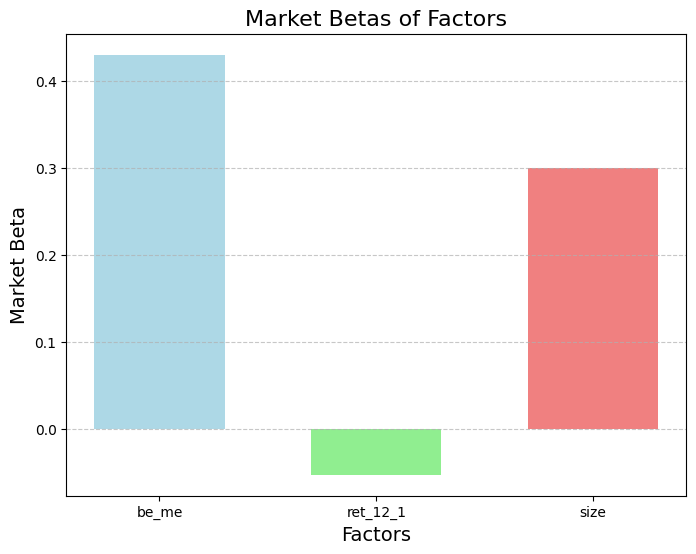

In [69]:
import matplotlib.pyplot as plt


colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(betas.keys(), betas.values(), color=colors, width=0.6)  # Reduced width to 0.6

# Adding titles and labels
plt.title('Market Betas of Factors', fontsize=16)
plt.ylabel('Market Beta', fontsize=14)
plt.xlabel('Factors', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar plot
plt.show()

In [70]:
# 2. Calculate Alpha for Each Factor (Annualized)
alphas = {}
for factor in ['be_me', 'ret_12_1', 'size']:
    # Define dependent (Y) and independent (X) variables
    Y = df[factor]  # Excess returns of the factor
    X = df['mkt']  # Excess market returns
    
    # Add a constant for the regression intercept
    X = sm.add_constant(X)
    
    # Run the regression
    model = sm.OLS(Y, X).fit()
    
    # Extract monthly alpha (intercept)
    monthly_alpha = model.params['const']
    
    # Annualize the alpha: Multiply by 12
    annual_alpha = monthly_alpha * 12
    alphas[factor] = annual_alpha

print("\nAnnualized Alphas:")
print(alphas)


Annualized Alphas:
{'be_me': np.float64(-7.440705482829857), 'ret_12_1': np.float64(4.112012251920218), 'size': np.float64(-1.7485146770950957)}


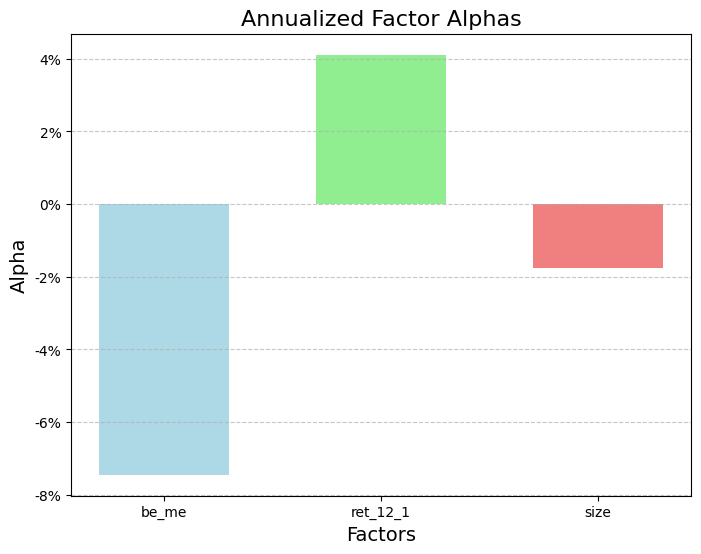

In [71]:
from matplotlib.ticker import FuncFormatter

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(alphas.keys(), alphas.values(), color=colors, width=0.6)  # Reduced width to 0.6

def to_percent(y, _):
    return f'{y:.0f}%'

# Adding titles and labels
plt.title('Annualized Factor Alphas', fontsize=16)
plt.ylabel('Alpha', fontsize=14)
plt.xlabel('Factors', fontsize=14)

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar plot
plt.show()

## Regression 2005 to 2011

In [72]:
import numpy as np
import statsmodels.api as sm

# Ensure the index is datetime and monthly frequency
# df.index = pd.to_datetime(df.index)
# df = df.asfreq('M')
df = factors['2005-01-01':'2011-12-31']

# 1. Calculate Market Beta for Each Factor
betas = {}
for factor in ['be_me', 'ret_12_1', 'size']:
    # Define dependent (Y) and independent (X) variables
    Y = df[factor] # Excess returns of the factor
    X = df['mkt']  # Excess market returns
    
    # Add a constant for the regression intercept
    X = sm.add_constant(X)
    
    # Run the regression
    model = sm.OLS(Y, X).fit()
    betas[factor] = model.params['mkt']  # Extract beta coefficient

print("Market Betas:")
print(betas)

Market Betas:
{'be_me': np.float64(0.3391298112589899), 'ret_12_1': np.float64(-0.061577698103317424), 'size': np.float64(0.259612821460774)}


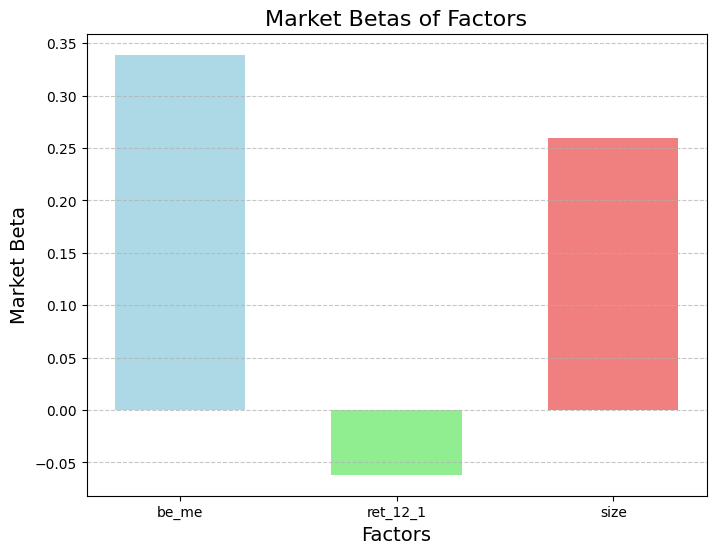

In [73]:
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(betas.keys(), betas.values(), color=colors, width=0.6)  # Reduced width to 0.6

# Adding titles and labels
plt.title('Market Betas of Factors', fontsize=16)
plt.ylabel('Market Beta', fontsize=14)
plt.xlabel('Factors', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar plot
plt.show()


Annualized Alphas:
{'be_me': np.float64(-7.914240965910011), 'ret_12_1': np.float64(4.09648753203404), 'size': np.float64(-1.9059709102839812)}


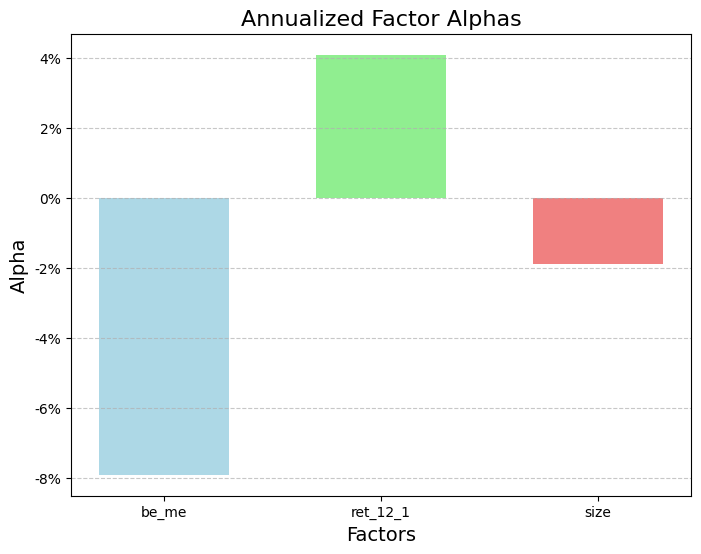

In [74]:
# 2. Calculate Alpha for Each Factor (Annualized)
alphas = {}
for factor in ['be_me', 'ret_12_1', 'size']:
    # Define dependent (Y) and independent (X) variables
    Y = df[factor]  # Excess returns of the factor
    X = df['mkt']  # Excess market returns
    
    # Add a constant for the regression intercept
    X = sm.add_constant(X)
    
    # Run the regression
    model = sm.OLS(Y, X).fit()
    
    # Extract monthly alpha (intercept)
    monthly_alpha = model.params['const']
    
    # Annualize the alpha: Multiply by 12
    annual_alpha = monthly_alpha * 12
    alphas[factor] = annual_alpha

print("\nAnnualized Alphas:")
print(alphas)

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(alphas.keys(), alphas.values(), color=colors, width=0.6)  # Reduced width to 0.6

def to_percent(y, _):
    return f'{y:.0f}%'

# Adding titles and labels
plt.title('Annualized Factor Alphas', fontsize=16)
plt.ylabel('Alpha', fontsize=14)
plt.xlabel('Factors', fontsize=14)

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar plot
plt.show()

## 2012 to 2016

Market Betas:
{'be_me': np.float64(0.6895496839524433), 'ret_12_1': np.float64(-0.10939632956281103), 'size': np.float64(0.38087947158701363)}


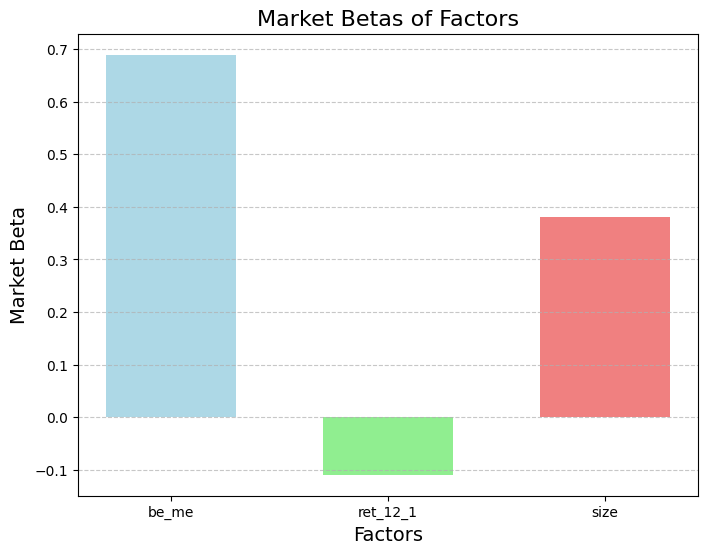

In [75]:
df = factors['2012-01-01':'2016-12-31']

# 1. Calculate Market Beta for Each Factor
betas = {}
for factor in ['be_me', 'ret_12_1', 'size']:
    # Define dependent (Y) and independent (X) variables
    Y = df[factor] # Excess returns of the factor
    X = df['mkt']  # Excess market returns
    
    # Add a constant for the regression intercept
    X = sm.add_constant(X)
    
    # Run the regression
    model = sm.OLS(Y, X).fit()
    betas[factor] = model.params['mkt']  # Extract beta coefficient

print("Market Betas:")
print(betas)

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(betas.keys(), betas.values(), color=colors, width=0.6)  # Reduced width to 0.6

# Adding titles and labels
plt.title('Market Betas of Factors', fontsize=16)
plt.ylabel('Market Beta', fontsize=14)
plt.xlabel('Factors', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar plot
plt.show()


Annualized Alphas:
{'be_me': np.float64(-9.766936110834173), 'ret_12_1': np.float64(-3.2270123662970684), 'size': np.float64(-2.0307339176428245)}


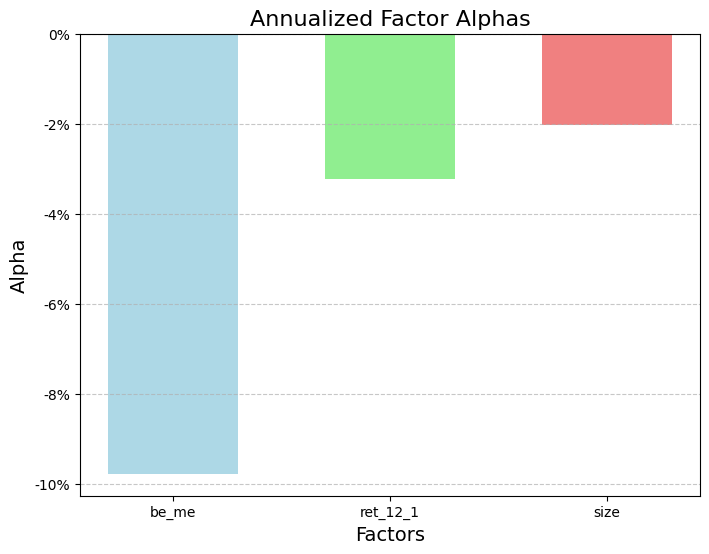

In [76]:
# 2. Calculate Alpha for Each Factor (Annualized)
alphas = {}
for factor in ['be_me', 'ret_12_1', 'size']:
    # Define dependent (Y) and independent (X) variables
    Y = df[factor]  # Excess returns of the factor
    X = df['mkt']  # Excess market returns
    
    # Add a constant for the regression intercept
    X = sm.add_constant(X)
    
    # Run the regression
    model = sm.OLS(Y, X).fit()
    
    # Extract monthly alpha (intercept)
    monthly_alpha = model.params['const']
    
    # Annualize the alpha: Multiply by 12
    annual_alpha = monthly_alpha * 12
    alphas[factor] = annual_alpha

print("\nAnnualized Alphas:")
print(alphas)

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(alphas.keys(), alphas.values(), color=colors, width=0.6)  # Reduced width to 0.6

def to_percent(y, _):
    return f'{y:.0f}%'

# Adding titles and labels
plt.title('Annualized Factor Alphas', fontsize=16)
plt.ylabel('Alpha', fontsize=14)
plt.xlabel('Factors', fontsize=14)

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar plot
plt.show()

## 2017 TO 2019

Market Betas:
{'be_me': np.float64(0.4373061005762625), 'ret_12_1': np.float64(0.22537009716279258), 'size': np.float64(0.36173359331473276)}


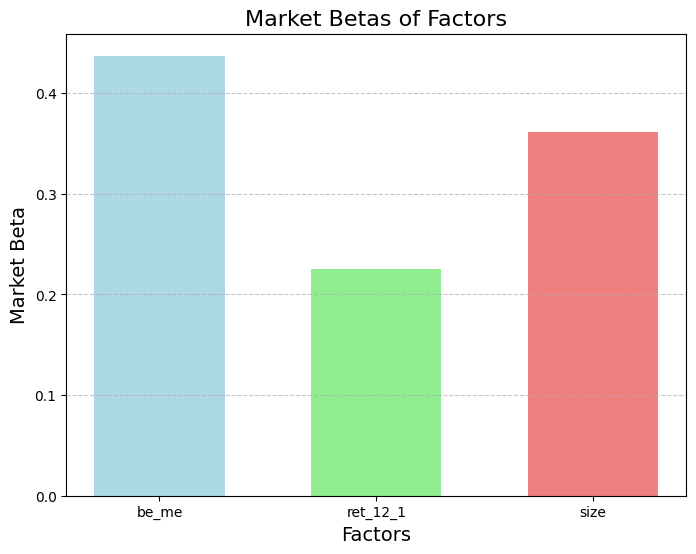

In [77]:
df = factors['2017-01-01':'2019-12-31']

# 1. Calculate Market Beta for Each Factor
betas = {}
for factor in ['be_me', 'ret_12_1', 'size']:
    # Define dependent (Y) and independent (X) variables
    Y = df[factor] # Excess returns of the factor
    X = df['mkt']  # Excess market returns
    
    # Add a constant for the regression intercept
    X = sm.add_constant(X)
    
    # Run the regression
    model = sm.OLS(Y, X).fit()
    betas[factor] = model.params['mkt']  # Extract beta coefficient

print("Market Betas:")
print(betas)

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(betas.keys(), betas.values(), color=colors, width=0.6)  # Reduced width to 0.6

# Adding titles and labels
plt.title('Market Betas of Factors', fontsize=16)
plt.ylabel('Market Beta', fontsize=14)
plt.xlabel('Factors', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar plot
plt.show()


Annualized Alphas:
{'be_me': np.float64(-16.59267806896265), 'ret_12_1': np.float64(13.797085413003279), 'size': np.float64(-15.190796432143353)}


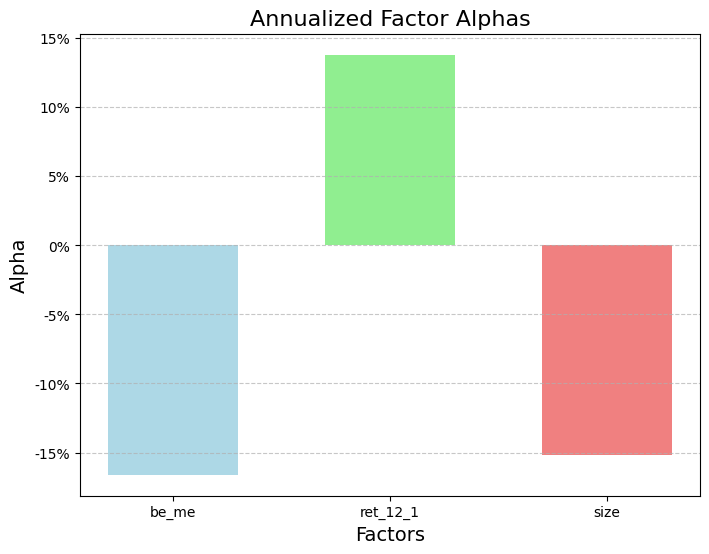

In [78]:
# 2. Calculate Alpha for Each Factor (Annualized)
alphas = {}
for factor in ['be_me', 'ret_12_1', 'size']:
    # Define dependent (Y) and independent (X) variables
    Y = df[factor]  # Excess returns of the factor
    X = df['mkt']  # Excess market returns
    
    # Add a constant for the regression intercept
    X = sm.add_constant(X)
    
    # Run the regression
    model = sm.OLS(Y, X).fit()
    
    # Extract monthly alpha (intercept)
    monthly_alpha = model.params['const']
    
    # Annualize the alpha: Multiply by 12
    annual_alpha = monthly_alpha * 12
    alphas[factor] = annual_alpha

print("\nAnnualized Alphas:")
print(alphas)

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(alphas.keys(), alphas.values(), color=colors, width=0.6)  # Reduced width to 0.6

def to_percent(y, _):
    return f'{y:.0f}%'

# Adding titles and labels
plt.title('Annualized Factor Alphas', fontsize=16)
plt.ylabel('Alpha', fontsize=14)
plt.xlabel('Factors', fontsize=14)

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar plot
plt.show()

# 2020 to 2022

Market Betas:
{'be_me': np.float64(0.40055345521160934), 'ret_12_1': np.float64(-0.09873565144245038), 'size': np.float64(0.3253019804724786)}


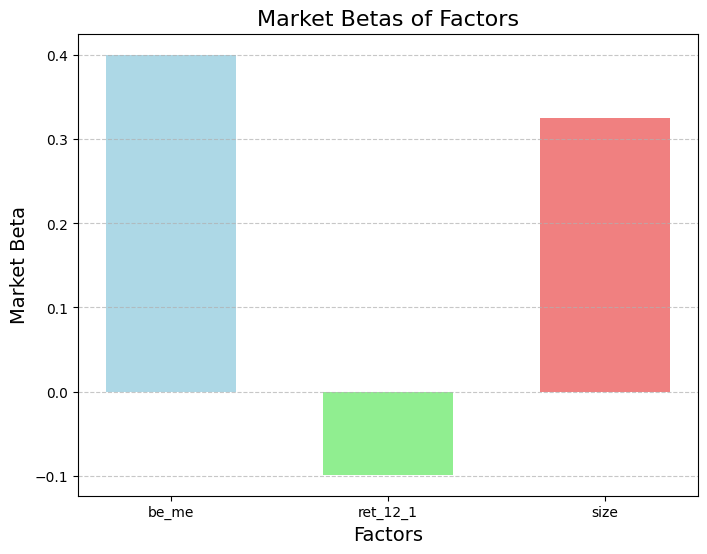

In [79]:
df = factors['2020-01-01':'2022-12-31']

# 1. Calculate Market Beta for Each Factor
betas = {}
for factor in ['be_me', 'ret_12_1', 'size']:
    # Define dependent (Y) and independent (X) variables
    Y = df[factor] # Excess returns of the factor
    X = df['mkt']  # Excess market returns
    
    # Add a constant for the regression intercept
    X = sm.add_constant(X)
    
    # Run the regression
    model = sm.OLS(Y, X).fit()
    betas[factor] = model.params['mkt']  # Extract beta coefficient

print("Market Betas:")
print(betas)

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(betas.keys(), betas.values(), color=colors, width=0.6)  # Reduced width to 0.6

# Adding titles and labels
plt.title('Market Betas of Factors', fontsize=16)
plt.ylabel('Market Beta', fontsize=14)
plt.xlabel('Factors', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar plot
plt.show()


Annualized Alphas:
{'be_me': np.float64(-0.49971330301076655), 'ret_12_1': np.float64(3.986723811597343), 'size': np.float64(6.420827984795649)}


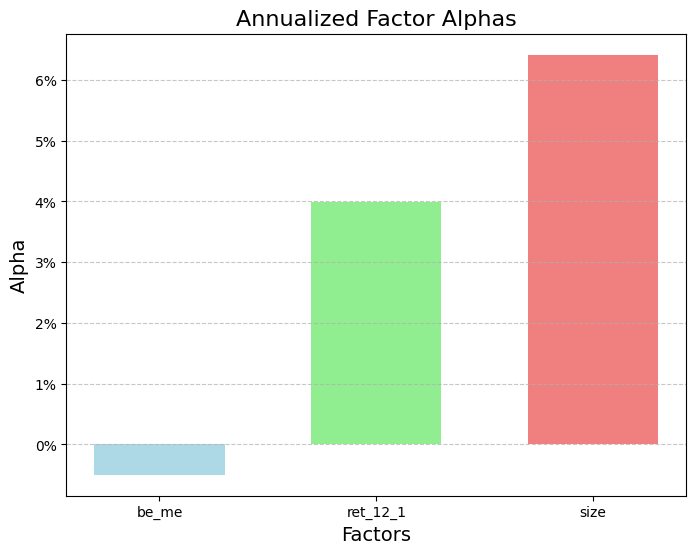

In [80]:
# 2. Calculate Alpha for Each Factor (Annualized)
alphas = {}
for factor in ['be_me', 'ret_12_1', 'size']:
    # Define dependent (Y) and independent (X) variables
    Y = df[factor]  # Excess returns of the factor
    X = df['mkt']  # Excess market returns
    
    # Add a constant for the regression intercept
    X = sm.add_constant(X)
    
    # Run the regression
    model = sm.OLS(Y, X).fit()
    
    # Extract monthly alpha (intercept)
    monthly_alpha = model.params['const']
    
    # Annualize the alpha: Multiply by 12
    annual_alpha = monthly_alpha * 12
    alphas[factor] = annual_alpha

print("\nAnnualized Alphas:")
print(alphas)

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(alphas.keys(), alphas.values(), color=colors, width=0.6)  # Reduced width to 0.6

def to_percent(y, _):
    return f'{y:.0f}%'

# Adding titles and labels
plt.title('Annualized Factor Alphas', fontsize=16)
plt.ylabel('Alpha', fontsize=14)
plt.xlabel('Factors', fontsize=14)

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar plot
plt.show()

## 2023

Market Betas:
{'be_me': np.float64(0.23574473968081414), 'ret_12_1': np.float64(0.3138460269783925), 'size': np.float64(0.08943274014397765)}
R-squared: 0.022563421127432592
T-statistics:
const    1.774169
mkt      0.480461
dtype: float64


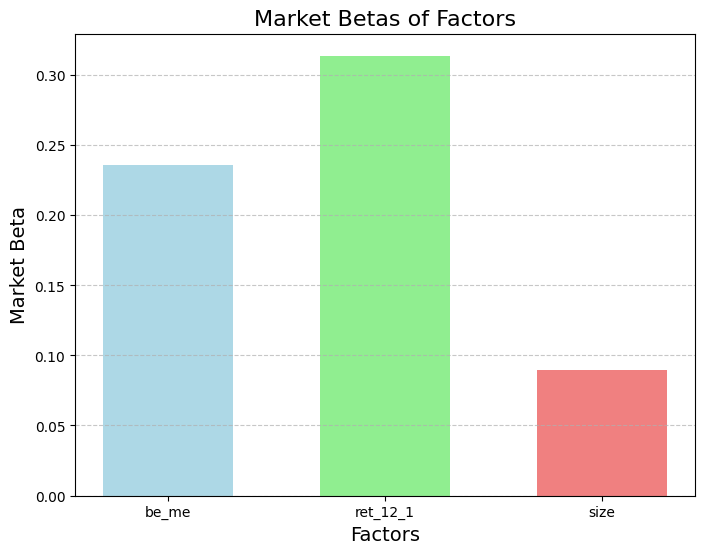

In [83]:
df = factors['2023-01-01':'2023-12-31']

# 1. Calculate Market Beta for Each Factor
betas = {}
for factor in ['be_me', 'ret_12_1', 'size']:
    # Define dependent (Y) and independent (X) variables
    Y = df[factor] # Excess returns of the factor
    X = df['mkt']  # Excess market returns
    
    # Add a constant for the regression intercept
    X = sm.add_constant(X)
    
    # Run the regression
    model = sm.OLS(Y, X).fit()
    betas[factor] = model.params['mkt']  # Extract beta coefficient

print("Market Betas:")
print(betas)

r_squared = model.rsquared
t_statistics = model.tvalues

# Display results
print(f"R-squared: {r_squared}")
print("T-statistics:")
print(t_statistics)

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(betas.keys(), betas.values(), color=colors, width=0.6)  # Reduced width to 0.6

# Adding titles and labels
plt.title('Market Betas of Factors', fontsize=16)
plt.ylabel('Market Beta', fontsize=14)
plt.xlabel('Factors', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar plot
plt.show()


Annualized Alphas:
{'be_me': np.float64(15.947454768083691), 'ret_12_1': np.float64(2.225196289551003), 'size': np.float64(18.52604770986312)}


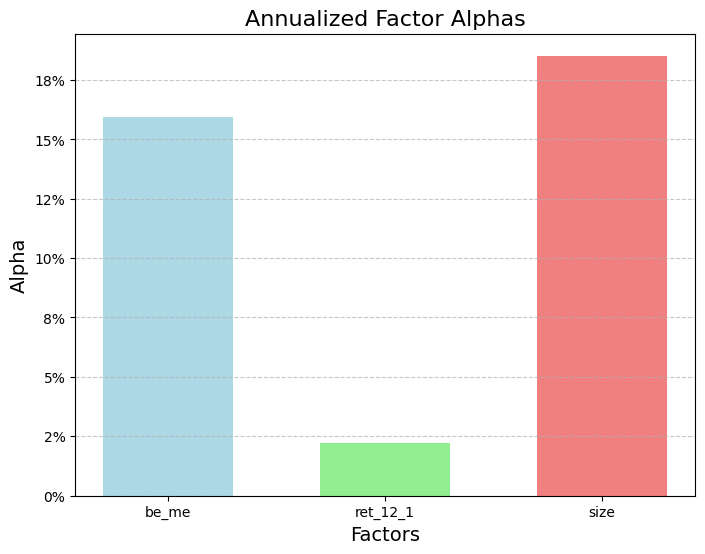

In [82]:
# 2. Calculate Alpha for Each Factor (Annualized)
alphas = {}
for factor in ['be_me', 'ret_12_1', 'size']:
    # Define dependent (Y) and independent (X) variables
    Y = df[factor]  # Excess returns of the factor
    X = df['mkt']  # Excess market returns
    
    # Add a constant for the regression intercept
    X = sm.add_constant(X)
    
    # Run the regression
    model = sm.OLS(Y, X).fit()
    
    # Extract monthly alpha (intercept)
    monthly_alpha = model.params['const']
    
    # Annualize the alpha: Multiply by 12
    annual_alpha = monthly_alpha * 12
    alphas[factor] = annual_alpha

print("\nAnnualized Alphas:")
print(alphas)

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(alphas.keys(), alphas.values(), color=colors, width=0.6)  # Reduced width to 0.6

def to_percent(y, _):
    return f'{y:.0f}%'

# Adding titles and labels
plt.title('Annualized Factor Alphas', fontsize=16)
plt.ylabel('Alpha', fontsize=14)
plt.xlabel('Factors', fontsize=14)

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar plot
plt.show()